# Thyroid Disease Data

### In this lesson, we will analyze whether thyroid cancer recurs or not after the initial treatment and develop a model for it

<img src=https://bulentaytac.net/wp-content/uploads/2018/06/prof-dr-bulent-aytac-tiroid-nedir.png width='300'>

<a href='https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data' target=_blank>You can find the data file here</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('Thyroid_Diff.csv')

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [5]:
df.shape

(383, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [8]:
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [9]:
e={'No': 0, 'Yes': 1}

In [10]:
df['Smoking']=df['Smoking'].map(e)

In [11]:
df['Hx Smoking']=df['Hx Smoking'].map(e)

In [12]:
df['Hx Radiothreapy']=df['Hx Radiothreapy'].map(e)

In [13]:
df['Recurred']=df['Recurred'].map(e)

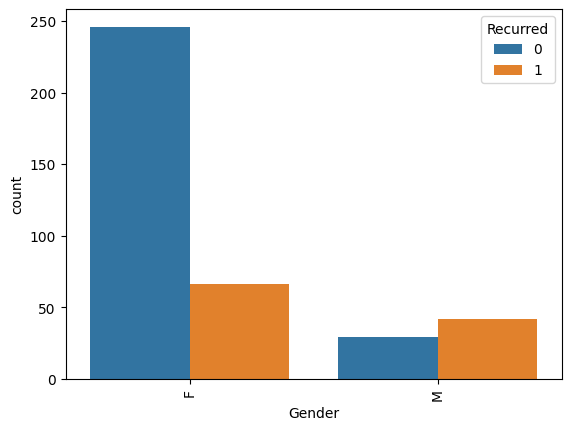

In [14]:
sns.countplot(x=df['Gender'],hue=df.Recurred)
plt.xticks(rotation=90);

<Axes: ylabel='count'>

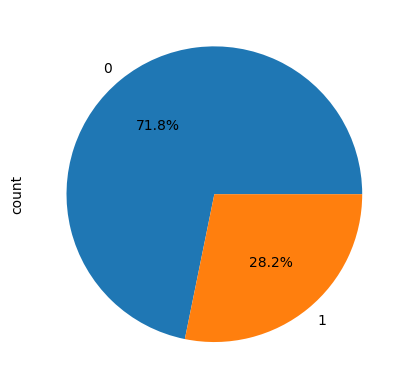

In [15]:
df['Recurred'].value_counts().plot.pie(autopct='%1.1f%%')

In [16]:
filtered_df = df[df['Recurred'] == 1]

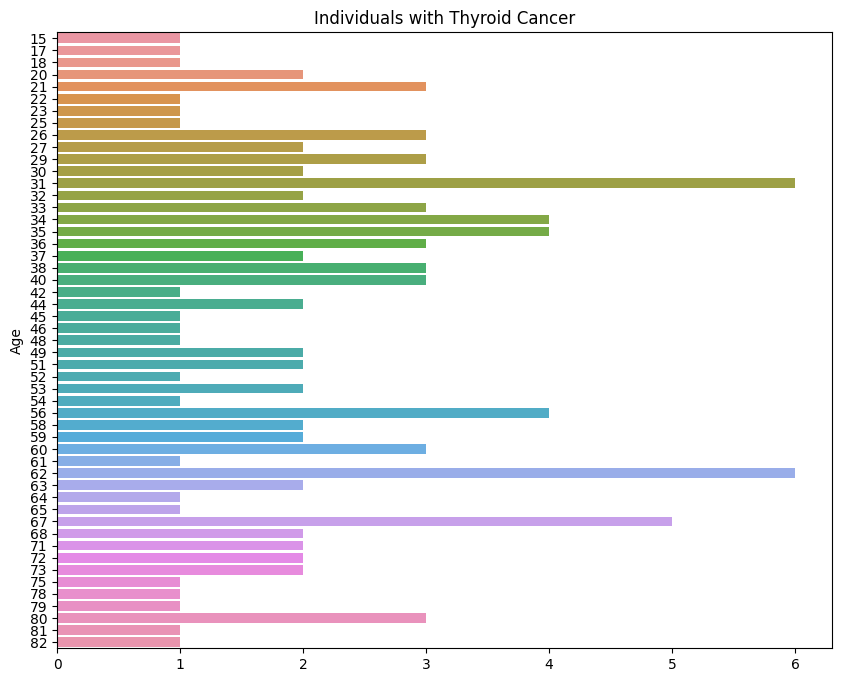

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y=filtered_df['Age'])
ax.set_xlabel('')
ax.set_title('Individuals with Thyroid Cancer')
plt.show()

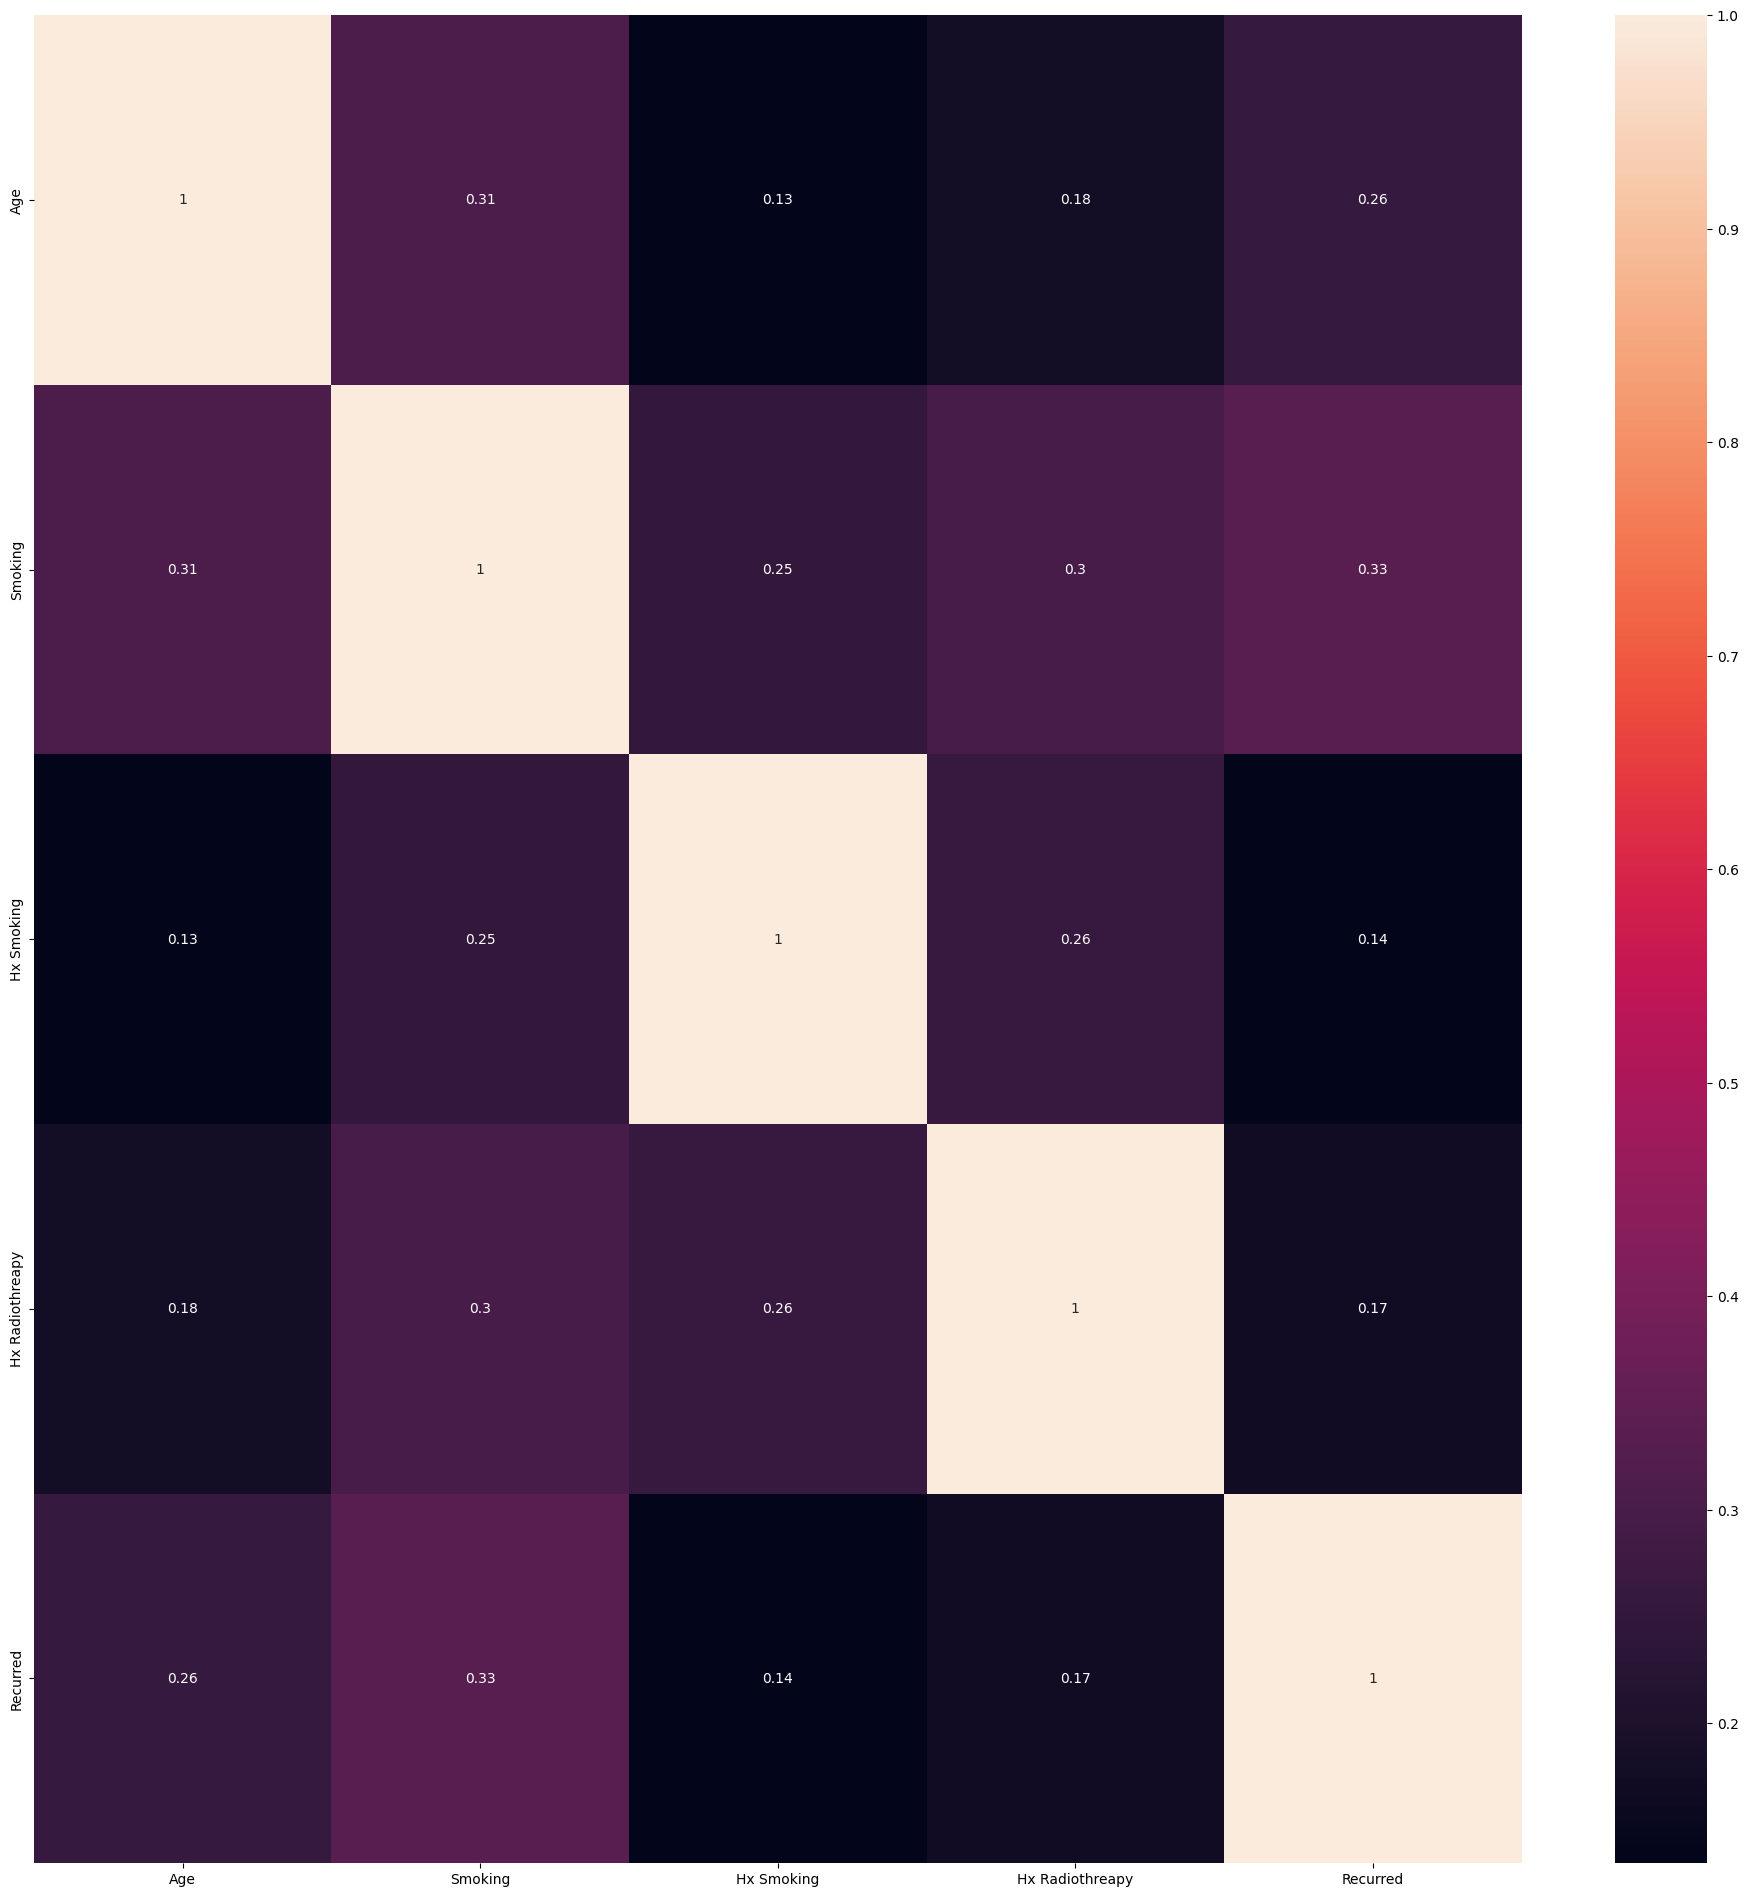

In [18]:
plt.figure(figsize=(24, 24)) 
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

In [19]:
x = df.drop(['Recurred'], axis=1)
y = df[['Recurred']]

In [20]:
x=pd.get_dummies(x,drop_first=True)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [23]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100,verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4464 - loss: 0.8145 - val_accuracy: 0.8831 - val_loss: 0.6299
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - loss: 0.5441 - val_accuracy: 0.8442 - val_loss: 0.5698
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.4011 - val_accuracy: 0.8312 - val_loss: 0.5178
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8926 - loss: 0.3446 - val_accuracy: 0.8831 - val_loss: 0.4770
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0.2817 - val_accuracy: 0.9481 - val_loss: 0.4406
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.2581 - val_accuracy: 0.9481 - val_loss: 0.4003
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9568 - loss: 0.1838 - val_accuracy: 0.9481 - val_loss: 0.3700
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.1410 - val_accuracy: 0.9610 - v

In [25]:
loss,accuracy=model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9935 - loss: 0.0501  


In [26]:
accuracy

0.9870129823684692

In [27]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [28]:
model.save('thyroid.h5')

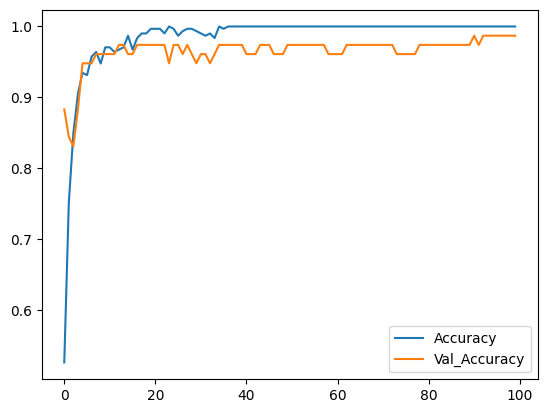

In [29]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

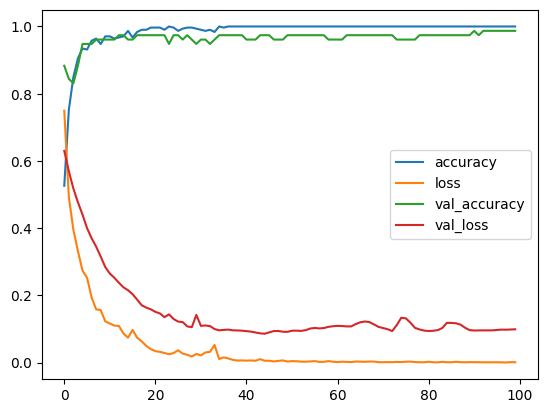

In [30]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[58,  0],
       [19,  0]])

In [33]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

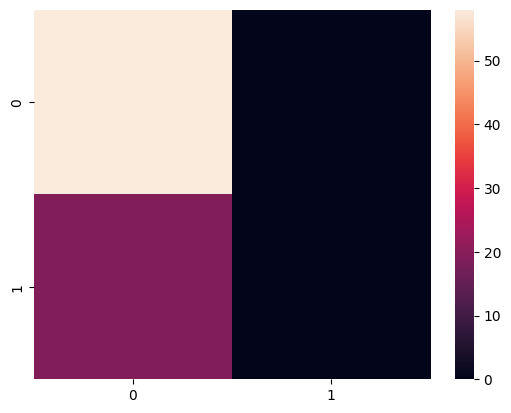

In [34]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [35]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        58
           1       0.00      0.00      0.00        19

    accuracy                           0.75        77
   macro avg       0.38      0.50      0.43        77
weighted avg       0.57      0.75      0.65        77




### With this model, we can predict whether thyroid cancer will recur after initial treatment